In [79]:
import glob
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['savefig.dpi'] = 600
import collections

In [45]:
def plot_rounds(base_path, title, xlabel, ylabel):
    paths = glob.glob(base_path + '*')
    try:
        # Converting all to numbers and sort them
        properties = sorted(list(set([int(x.split('_')[-1]) for x in paths])))
    except:
        delimiter = base_path.split('_')[-2] + '_'
        properties = sorted(list(set([x.split(delimiter)[-1] for x in paths])))
        
    if properties == ['close_to_path', 'composite', 'path', 'path_end']:
        properties = ['path', 'path_end', 'close_to_path', 'composite']
    print("Properties: " + str(properties))
    
    eval_dict = {} # property -> epochs until finish
    for property_ in properties:
        epochs_to_finish = []
        mutation_paths = glob.glob(base_path + str(property_))
        for path in mutation_paths:
            if os.path.isfile(path + "/finish_history.json"):
                fitnesses = json.load(open(path + "/fitness_history.json"))
                epochs_to_finish.append(len(fitnesses))
        eval_dict[property_] = epochs_to_finish
    print("Dict: " + str(eval_dict))
    
    data = eval_dict.values()
    if properties == ['path', 'path_end', 'close_to_path', 'composite']:
        ordered_data = collections.OrderedDict()
        for k in properties:
            ordered_data[k] = eval_dict[k]
        print(ordered_data)
    else:
        ordered_data = collections.OrderedDict(sorted(eval_dict.items()))
    plt.boxplot(list(ordered_data.values()))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(list(range(1, len(eval_dict.keys())+1)), ordered_data.keys())
    n = len(list(eval_dict.values())[0])
    plt.title(title.format(n))
    plt.show()

Properties: ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', 'dynamic']
Dict: {'0.7': [7, 1, 37], '0.3': [2, 14, 15], 'dynamic': [2, 1, 10], '0.4': [5, 1, 3], '0.2': [58, 5, 1], '0.6': [8, 23, 6], '0.5': [68, 1, 1]}


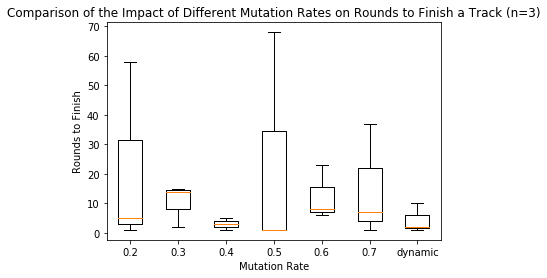

In [3]:
plot_rounds(base_path='26-Feb-2018_12:11:40rounds_100_num_networks_10evalround_*_test1_mutation_rate_',
            title="Comparison of the Impact of Different Mutation Rates on Rounds to Finish a Track (n={})",
            xlabel="Mutation Rate", ylabel="Rounds to Finish")

Properties: ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', 'dynamic']
Dict: {'0.1': [58, 13, 4, 1, 3, 8, 8, 6, 10], '0.9': [1, 1, 3, 1, 2, 6, 24, 2, 1, 4], '0.7': [2, 1, 15, 17, 1, 1, 2, 9, 7, 27], '0.3': [11, 7, 26, 58, 15, 3, 10, 5], 'dynamic': [6, 7, 101, 2, 3, 9, 1, 76, 1, 28], '0.4': [7, 4, 6, 53, 17, 5, 12, 7], '0.2': [13, 101, 10, 7, 17, 4, 29, 6], '0.6': [8, 42, 5, 4, 16, 2, 31, 11, 5, 6], '0.5': [22, 7, 27, 9, 44, 1, 7, 56], '0.8': [8, 1, 78, 18, 5, 10, 8, 17, 20, 5]}


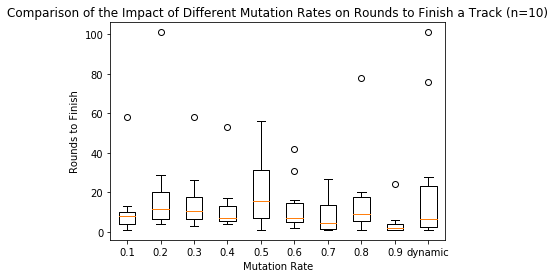

In [9]:
plot_rounds(base_path='26-Feb-2018_12:32:22rounds_100_num_networks_10evalround_*_test1_mutation_rate_',
            title="Comparison of the Impact of Different Mutation Rates on Rounds to Finish a Track (n=10)",
            xlabel="Mutation Rate", ylabel="Rounds to Finish")

Properties: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Dict: {2: [101, 101, 101, 101, 101, 101, 101, 79, 101], 3: [101, 4, 101, 101, 87, 101, 101, 101, 8], 4: [11, 61, 6, 77, 1, 5, 1, 3], 5: [16, 5, 9, 63, 3, 8, 4, 1], 6: [2, 2, 7, 12, 68, 6, 4, 10, 19], 7: [10, 5, 13, 48, 1, 11, 4, 4, 52, 23], 8: [1, 6, 15, 11, 8, 12, 6, 4, 1, 14], 9: [1, 4, 8, 13, 53, 8, 101, 19, 1, 4], 10: [1, 7, 3, 2, 1, 30, 1, 19, 4]}


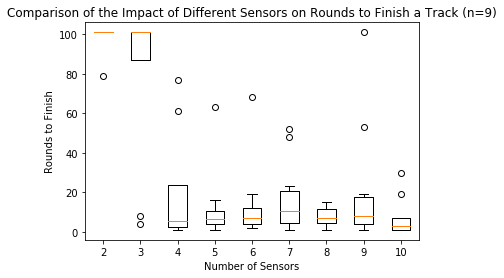

In [5]:
plot_rounds(base_path='26-Feb-2018_14:38:52rounds_100_num_networks_10evalround_*_test2_sensors_',
            title="Comparison of the Impact of Different Sensors on Rounds to Finish a Track (n={})",
            xlabel="Number of Sensors", ylabel="Rounds to Finish")

Properties: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Dict: {2: [101, 101, 97, 18, 101, 101, 96, 101, 25, 101], 3: [101, 19, 101, 83, 101, 101, 101], 4: [18, 29, 3, 4, 3, 14, 5], 5: [19, 15, 11, 1, 13, 1, 4, 75], 6: [1, 66, 1, 4, 3, 11, 4, 1, 7], 7: [1, 5, 26, 4, 29, 1, 1, 12, 10], 8: [17, 11, 3, 7, 7, 1, 7, 7], 9: [16, 70, 11, 1, 1, 1, 5, 1], 10: [3, 34, 1, 48, 26, 1, 1, 12, 10]}


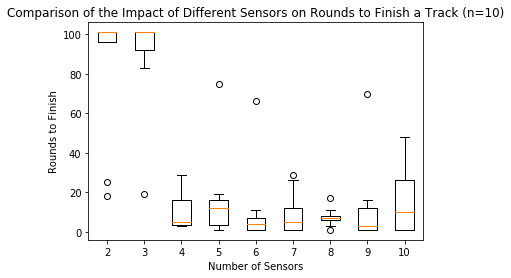

In [6]:
plot_rounds(base_path='26-Feb-2018_22:08:11rounds_100_num_networks_10evalround_*_test2_sensors_',
            title="Comparison of the Impact of Different Sensors on Rounds to Finish a Track (n={})",
            xlabel="Number of Sensors", ylabel="Rounds to Finish")

Properties: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Dict: {2: [101, 101, 101, 101, 101, 97, 18, 101, 101, 101, 101, 101, 101, 79, 96, 101, 101, 25, 101], 3: [101, 4, 101, 101, 19, 101, 101, 83, 101, 87, 101, 101, 101, 101, 101, 8], 4: [18, 29, 3, 11, 4, 61, 6, 77, 1, 3, 5, 14, 1, 3, 5], 5: [19, 15, 11, 16, 1, 5, 13, 9, 1, 63, 4, 75, 3, 8, 4, 1], 6: [2, 1, 2, 7, 66, 12, 1, 68, 6, 4, 4, 10, 3, 19, 11, 4, 1, 7], 7: [1, 10, 5, 5, 26, 4, 13, 48, 1, 11, 29, 1, 1, 4, 4, 52, 12, 23, 10], 8: [1, 6, 17, 15, 11, 3, 7, 7, 1, 7, 11, 8, 12, 7, 6, 4, 1, 14], 9: [16, 70, 1, 11, 1, 4, 8, 13, 53, 8, 1, 1, 5, 101, 19, 1, 1, 4], 10: [1, 3, 34, 1, 7, 48, 26, 3, 2, 1, 30, 1, 1, 12, 10, 1, 19, 4]}


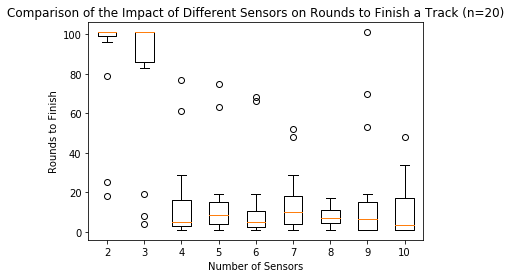

In [7]:
plot_rounds(base_path='26-Feb-2018_*rounds_100_num_networks_10evalround_*_test2_sensors_',
            title="Comparison of the Impact of Different Sensors on Rounds to Finish a Track (n=20)",
            xlabel="Number of Sensors", ylabel="Rounds to Finish")

Properties: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Dict: {2: [101, 101, 101, 101, 101, 101, 101], 3: [101, 101, 101, 101], 4: [7, 5, 94, 101, 31], 5: [25, 101, 101, 101, 101], 6: [8, 37, 61, 27], 7: [16, 16, 14, 5, 35, 101], 8: [101, 5, 40, 92, 3, 14, 7], 9: [5, 15, 101, 14, 9, 101, 101], 10: [11, 10, 101, 29, 26, 2, 1]}


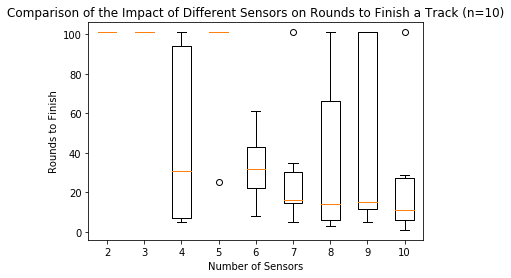

In [8]:
plot_rounds(base_path='02-Mar-2018_*rounds_100_num_networks_10evalround_*_test2_sensors_',
            title="Comparison of the Impact of Different Sensors on Rounds to Finish a Track (n=10)",
            xlabel="Number of Sensors", ylabel="Rounds to Finish")

Properties: <filter object at 0x7f39b3de00b8>
Dict: {'0.3': [1, 18, 5, 94, 1, 22, 5, 7, 54, 34, 13, 3, 15, 17, 19, 101, 101, 1, 12, 20, 1, 16, 4, 18, 22, 7], '0.2': [1, 31, 76, 4, 44, 14, 6, 5, 81, 8, 72, 3, 1, 101, 33, 101, 6, 101, 70, 23, 2, 16, 14, 39, 2], '0.1': [101, 2, 101, 67, 101, 11, 12, 20, 8, 14, 6, 53, 1, 1, 4, 11, 1, 53, 1, 1, 43, 101, 93, 101, 4, 6, 1, 2, 13, 1, 27, 5, 22, 1, 38, 8, 11, 18, 5, 11, 1, 41, 71, 39, 16, 101, 57, 11, 5, 1, 2, 6, 10, 10, 21, 23, 15, 32, 63, 11, 10, 2, 27, 72, 29, 10, 1, 98, 5, 19, 21, 2, 19, 61], '0.7': [13, 1, 4, 1, 3, 1, 1, 3, 22, 13, 4, 4, 66, 11, 1, 15, 51, 4, 6, 40, 10, 10, 6, 8, 101], 'dynamic': [1, 8, 18, 14, 15, 57, 26, 7, 22, 14, 7, 1, 1, 8, 2, 5, 14, 30, 17, 2, 25, 7, 11, 1, 17], '0.5': [51, 1, 3, 9, 51, 26, 59, 3, 25, 9, 25, 34, 1, 5, 20, 34, 35, 1, 1, 9, 72, 1, 1, 5], '0.6': [7, 1, 2, 1, 1, 4, 3, 101, 6, 9, 7, 1, 3, 2, 12, 1, 3, 1, 45, 74, 1, 22, 6, 2], '0.4': [55, 4, 41, 45, 1, 23, 24, 40, 101, 8, 101, 30, 6, 27, 11, 6, 4, 13, 15, 

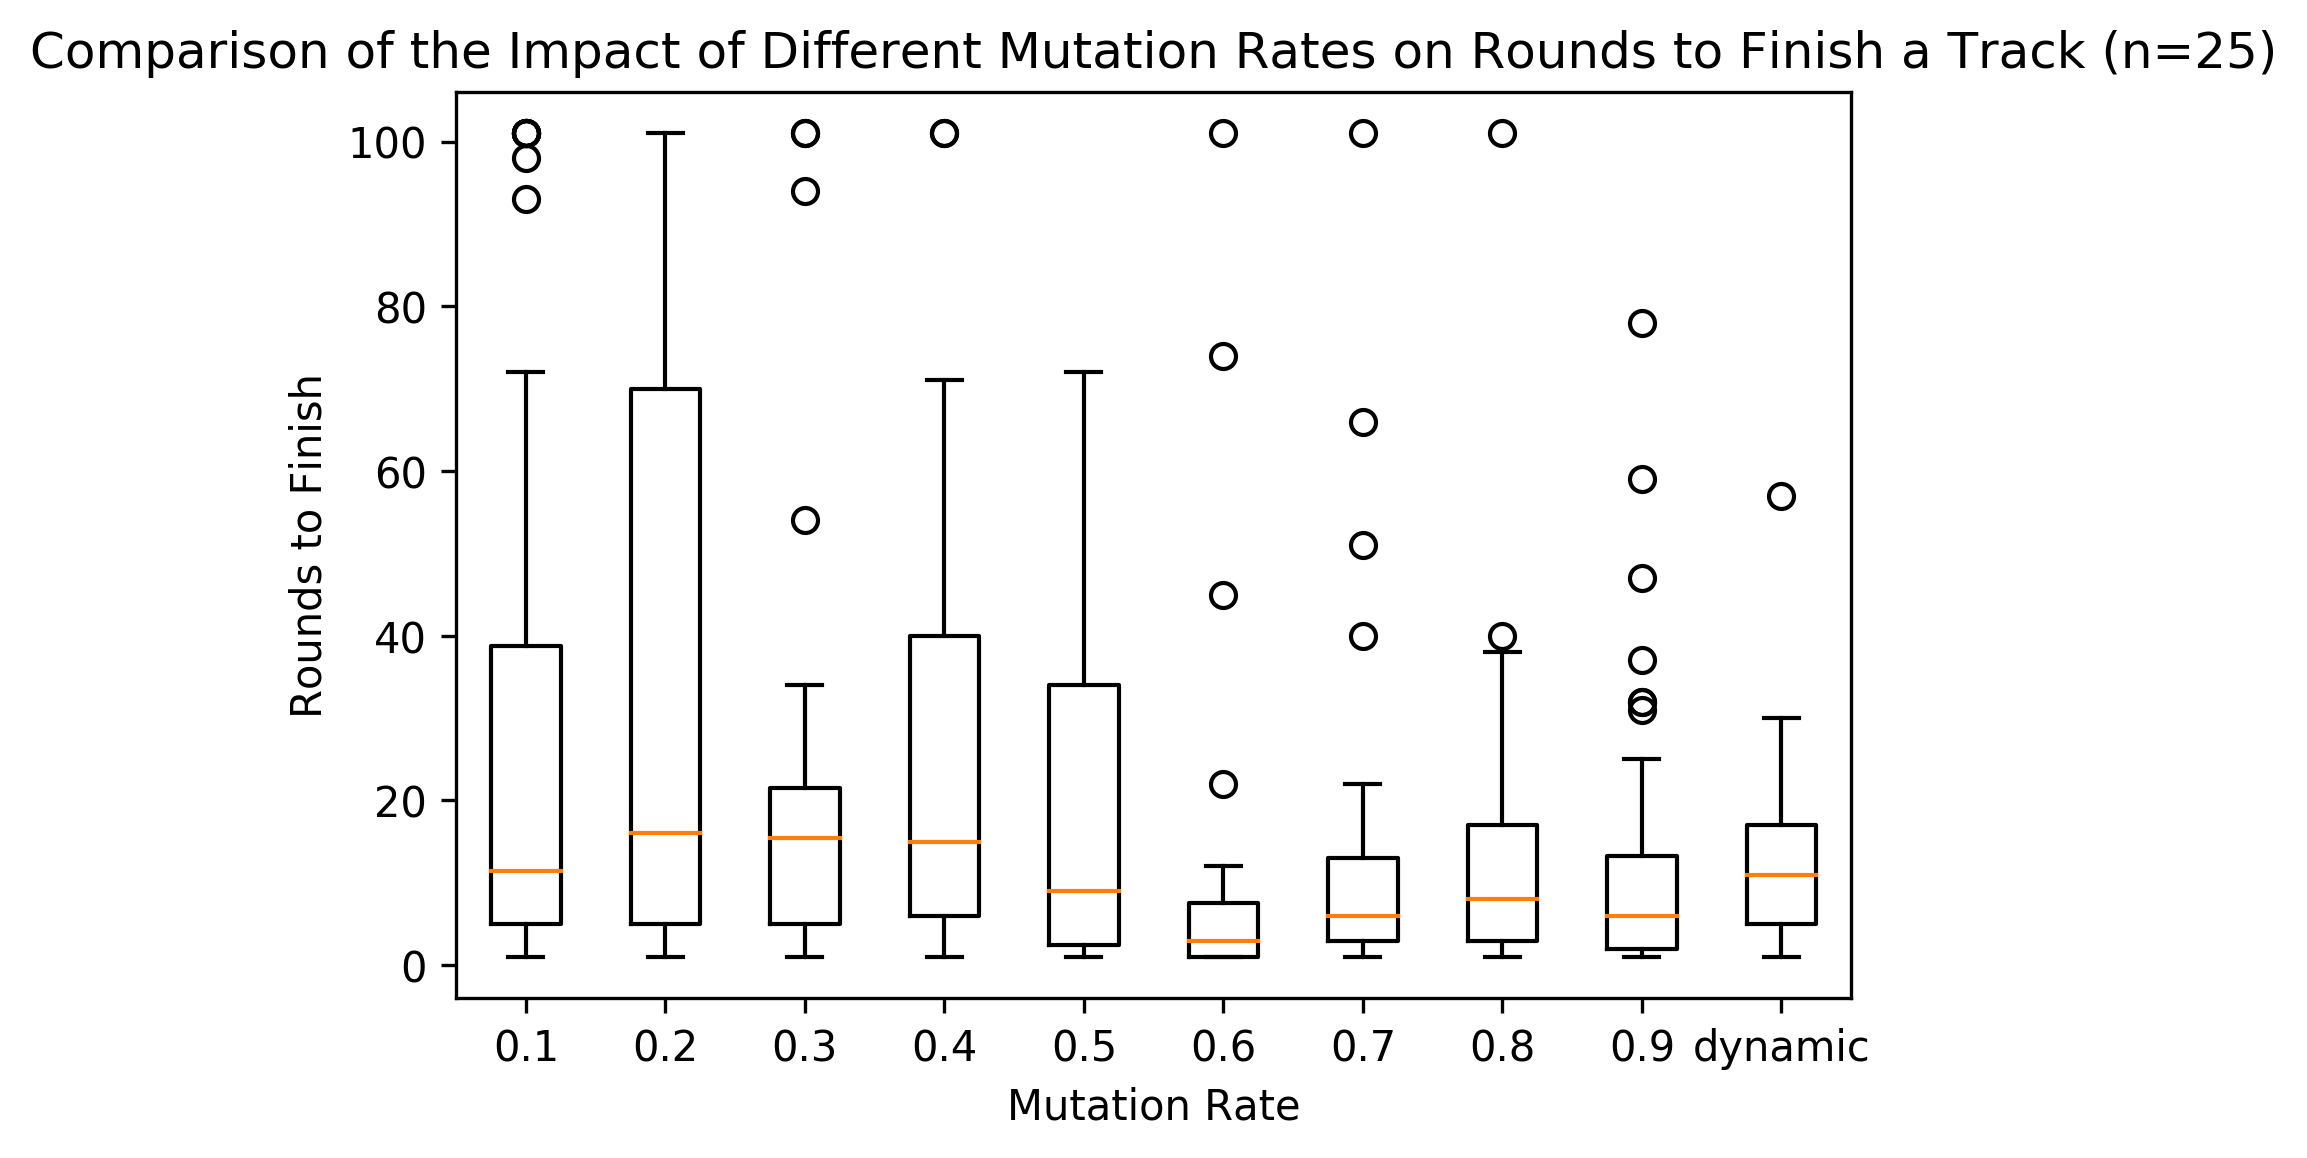

In [14]:
#Different Maps
plot_rounds(base_path='05-Mar-2018_*rounds_100_num_networks_10evalround_*_test5_seed_*_mutation_rate_',
            title="Comparison of the Impact of Different Mutation Rates on Rounds to Finish a Track (n=25)",
            xlabel="Mutation Rate", ylabel="Rounds to Finish")

Properties: ['close_to_path', 'composite', 'path', 'path_end']
Dict: {'composite': [27, 5, 9, 1, 17, 72, 20, 31, 101, 101, 5, 39, 9, 101, 1, 80, 1, 101, 4], 'path_end': [21, 78, 1, 5, 1, 7, 39, 2, 4, 3, 4, 15, 1, 24, 3, 9, 1, 59, 2], 'path': [8, 18, 48, 1, 5, 88, 9, 4, 2, 1, 38, 11, 21, 5, 3, 6, 1, 22, 1], 'close_to_path': [101, 10, 53, 101, 1, 1, 101, 101, 101, 1, 15, 1, 101, 101, 101, 1, 101, 101, 101]}


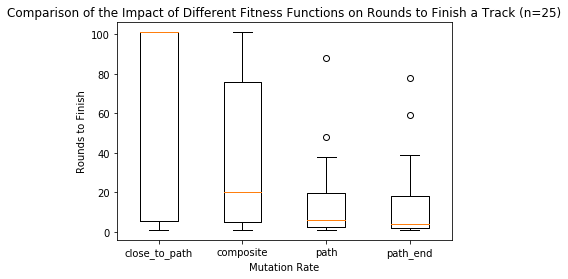

In [24]:
#Different Maps
plot_rounds(base_path='05-Mar-2018_*rounds_100_num_networks_10evalround_*_test3_functions_',
            title="Comparison of the Impact of Different Fitness Functions on Rounds to Finish a Track (n=25)",
            xlabel="Mutation Rate", ylabel="Rounds to Finish")

Properties: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Dict: {2: [51, 51, 51, 51, 51, 51, 51, 51, 51, 7, 29, 51, 51, 51, 51, 51], 3: [51, 51, 51, 51, 51, 51, 51, 51, 51, 10, 51, 51, 51, 1], 4: [4, 51, 8, 15, 51, 18, 28, 6, 2, 1, 51, 19, 51, 39, 51], 5: [6, 51, 1, 23, 36, 3, 6, 10, 10, 51, 7, 46], 6: [24, 50, 51, 2, 10, 5, 43, 4, 3, 51, 15, 11, 12, 16, 3], 7: [9, 44, 34, 13, 51, 5, 51, 3, 21, 49, 6, 4, 5, 9, 26], 8: [51, 41, 18, 2, 23, 5, 14, 14, 5, 1, 17, 16, 51], 9: [12, 18, 1, 5, 1, 6, 26, 23, 3, 28, 12, 10, 3, 19], 10: [9, 8, 1, 3, 5, 42, 15, 11, 1, 11, 24, 5, 1, 10, 3]}


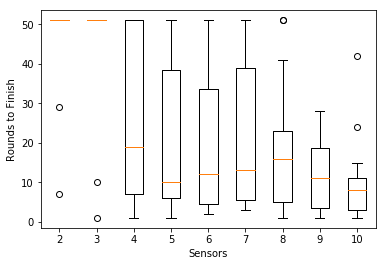

In [4]:
#Different Maps
plot_rounds(base_path='06-Mar-2018_*rounds_50_num_networks_10evalround_*_test5_seed_*_sensors_',
            title="",#Comparison of the Impact of Different Amount of Sensors on Rounds to Finish a Track (n={})",
            xlabel="Sensors", ylabel="Rounds to Finish")

Properties: ['fixed', 'random_each']
Dict: {'fixed': [51, 51, 1, 1, 51, 9, 25, 1, 1, 1, 46, 17, 5, 5, 51, 8, 51, 51, 4, 1, 22, 21, 51, 35, 35, 51, 14, 21, 26, 2, 19, 51, 51, 1, 14, 6, 6, 14, 11, 1, 3, 51, 1, 19, 8, 1, 51, 11, 1, 10, 51, 32, 4, 5, 9, 48, 3, 16, 51, 31, 31, 51, 2, 20, 6, 29, 2, 51, 5, 51, 48, 6, 51, 4], 'random_each': [2, 51, 28, 9, 51, 9, 7, 51, 14, 32, 19, 23, 5, 51, 51, 33, 27, 3, 16, 6, 11, 51, 51, 16, 44, 51, 19, 3, 51, 1, 51, 32, 12, 3, 1, 2, 51, 1, 7, 8, 6, 7, 51, 10, 25, 20, 7, 6, 7, 4, 17, 51, 5, 6, 6, 6, 17, 11, 51, 10, 13, 1, 28, 1, 51, 13, 30, 51, 13, 1, 1, 7, 18, 51, 9, 1, 7]}


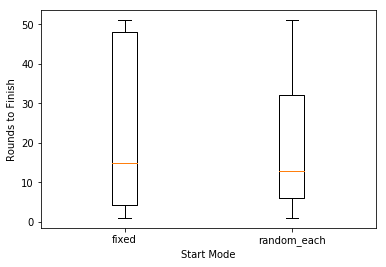

In [20]:
#Different Maps
plot_rounds(base_path='06-Mar-2018_*rounds_50_num_networks_10evalround_*_test7_seed_*_start_mode_',
            title="",#Comparison of the Impact of Different Amount of Sensors on Rounds to Finish a Track (n={})",
            xlabel="Start Mode", ylabel="Rounds to Finish")

Properties: ['path', 'path_end', 'close_to_path', 'composite']
Dict: {'path': [4, 7, 20, 51, 51, 14, 51, 4, 51, 5, 41, 51, 1, 12, 3, 7, 2, 49, 1, 4, 8, 51, 51, 51, 8, 23, 36, 5, 1, 8, 3, 14, 51, 19, 17, 10, 16, 51, 8, 51, 5, 51, 51, 1, 25, 25, 11, 34, 7, 51, 51, 3, 3, 3, 51, 11, 17], 'close_to_path': [51, 51, 51, 8, 51, 1, 51, 51, 51, 51, 1, 1, 51, 6, 51, 1, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 14, 51, 51, 51, 51, 46, 51, 51, 1, 51, 51, 1, 2, 51, 51, 1, 51, 51, 10, 51, 1, 51, 49, 51, 51, 51, 1, 51], 'composite': [51, 1, 51, 3, 51, 49, 1, 27, 10, 51, 9, 12, 51, 17, 51, 1, 51, 15, 9, 51, 51, 51, 51, 6, 12, 23, 2, 1, 51, 2, 19, 3, 51, 11, 8, 13, 51, 11, 4, 5, 51, 15, 3, 51, 24, 1, 1, 26, 51, 51, 51, 6, 30, 5, 51, 11, 9, 3, 13], 'path_end': [51, 51, 33, 4, 12, 4, 51, 4, 10, 31, 23, 51, 30, 51, 49, 11, 23, 6, 13, 4, 51, 4, 15, 51, 30, 12, 14, 9, 51, 37, 51, 11, 21, 51, 51, 6, 51, 37, 51, 10, 51, 43, 1, 11, 8, 1, 13, 32, 6, 15, 51, 51, 2, 1, 51, 7, 51, 2, 5

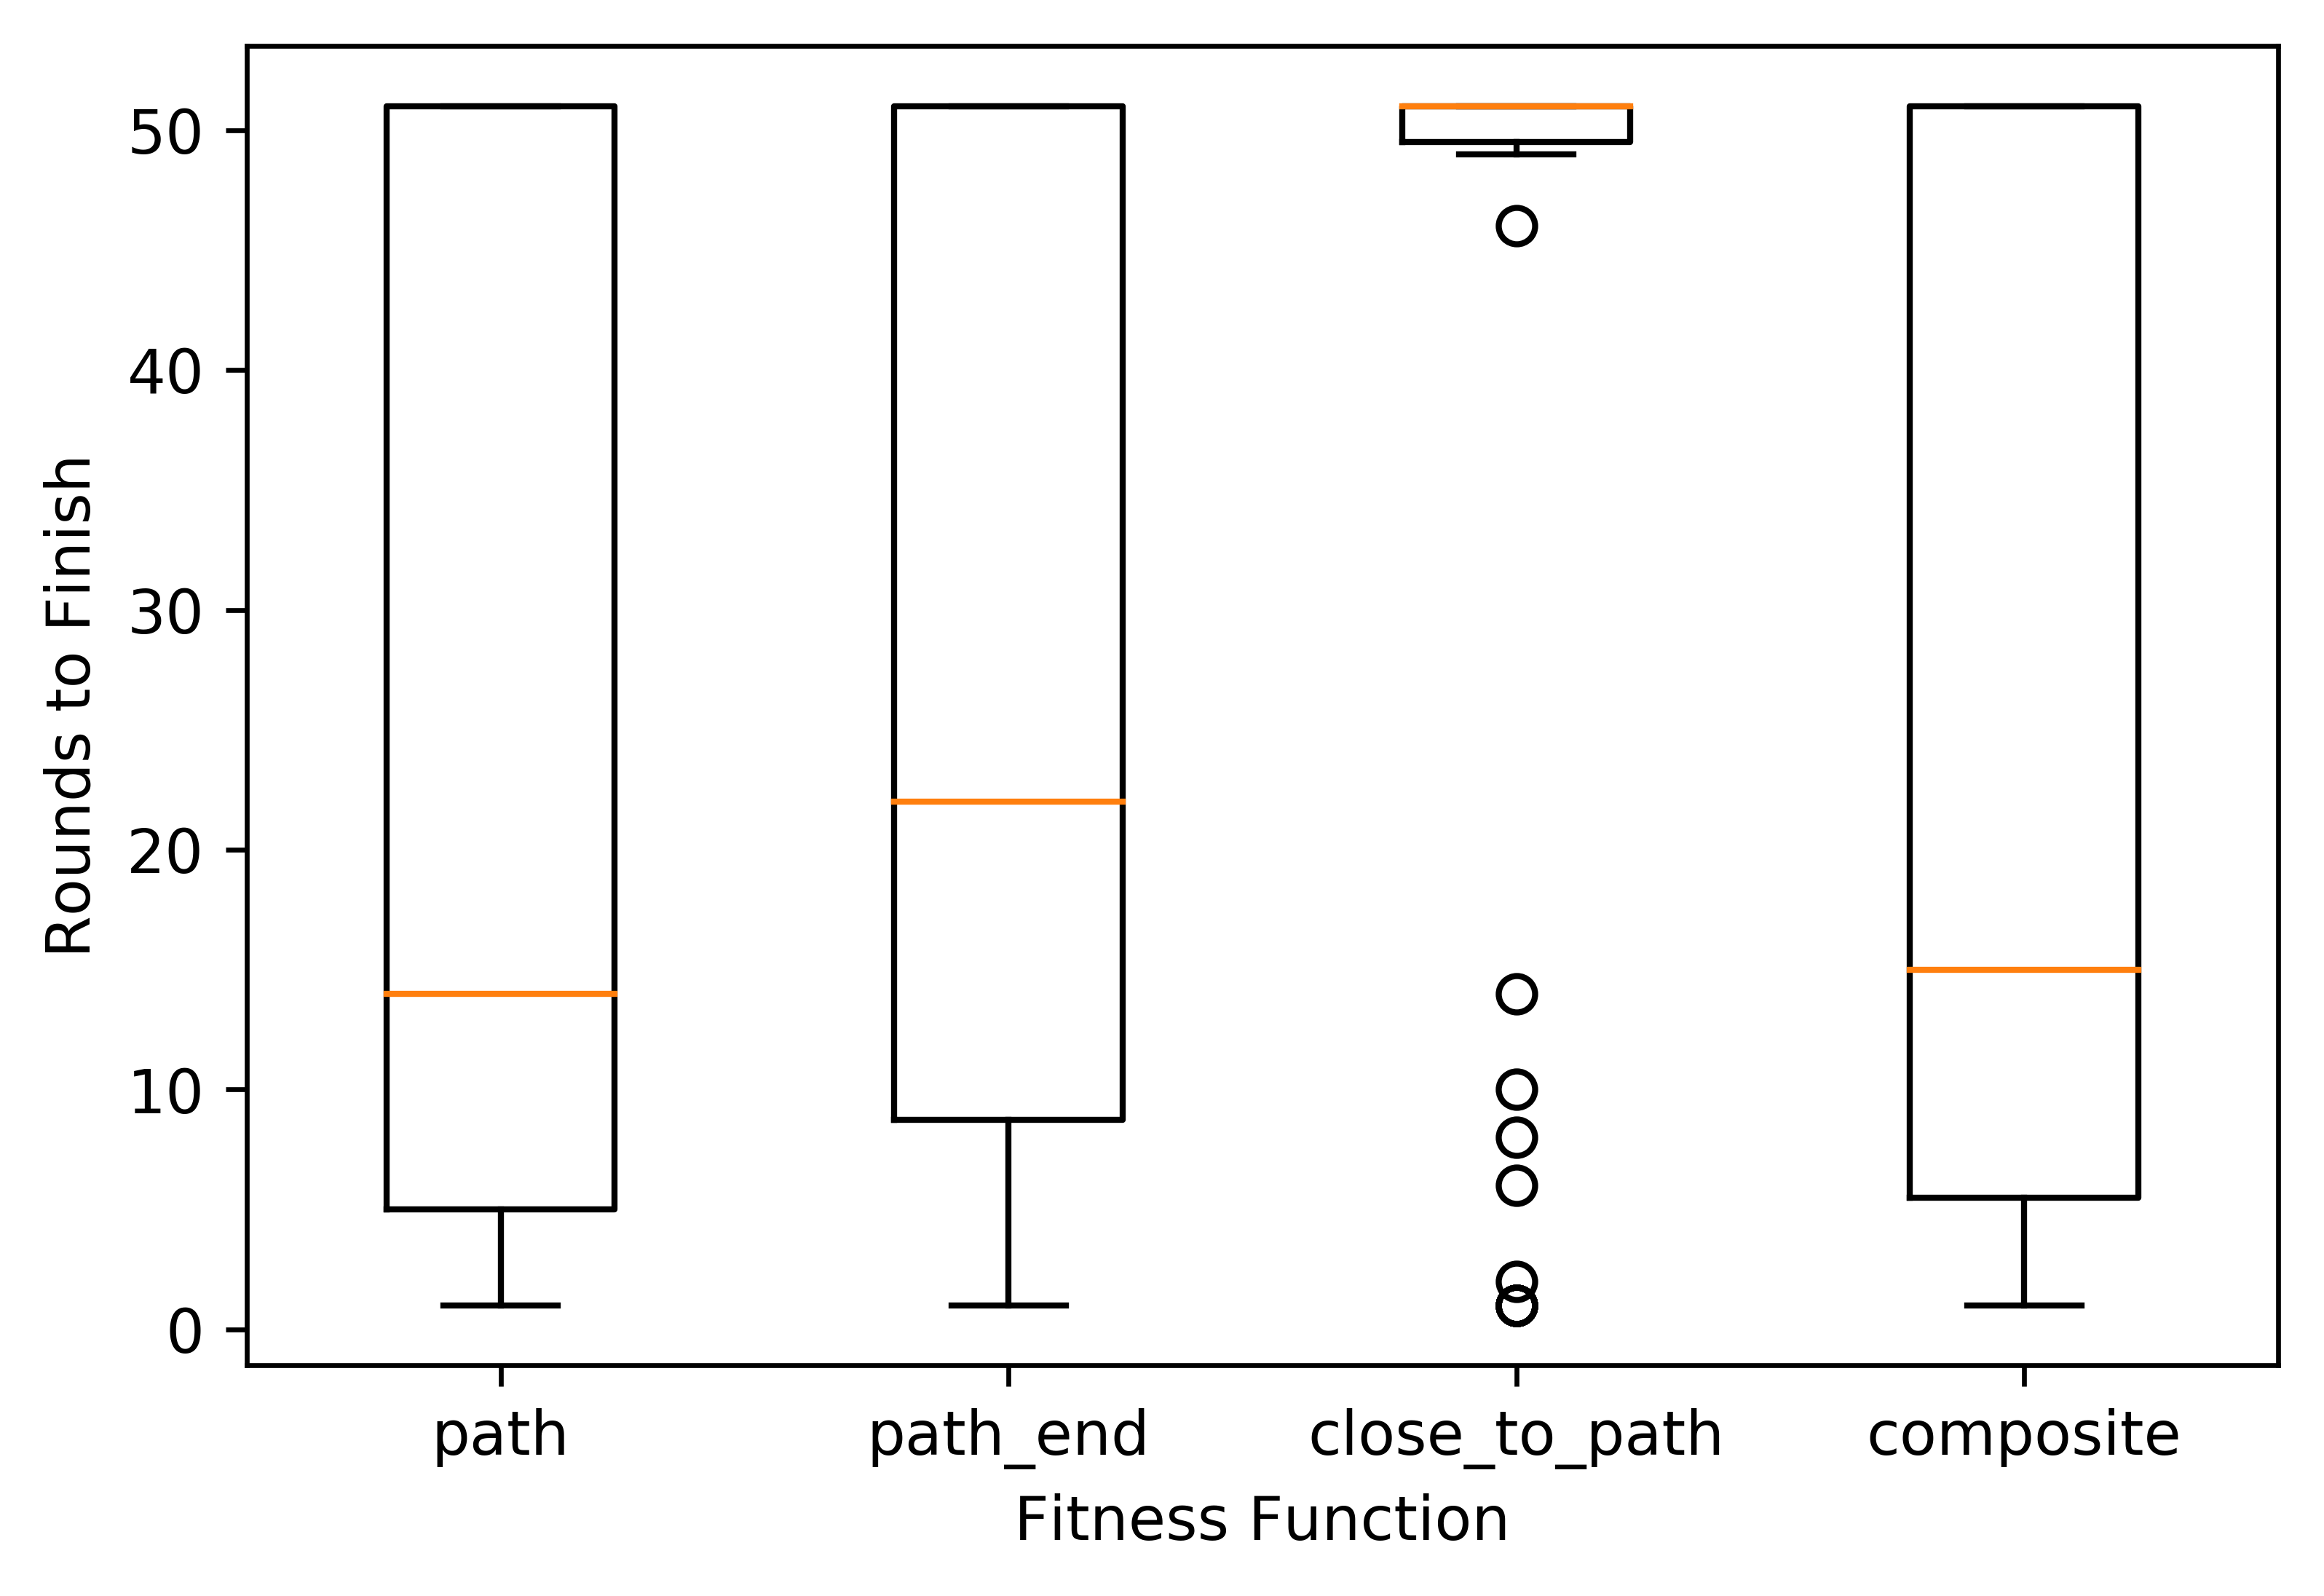

In [82]:
#Different Maps
plot_rounds(base_path='06-Mar-2018_*rounds_50_num_networks_10evalround_*_test8_seed_*_functions_',
            title="",#Comparison of the Impact of Different Amount of Sensors on Rounds to Finish a Track (n={})",
            xlabel="Fitness Function", ylabel="Rounds to Finish")

eval_dict_fitnesses: OrderedDict([('static_simple', [-127.95016668465843, 426.9097255940626, 352.68136733470413, 478.789970251212, 2266.7187497631166, 1364.867737049617, 2562.6047256735014, 477.39598510107817, 459.8063380985112, 1013.7311768943845, 2130.630287857181, 563.5622748920442, 660.9331596598145, 580.3774139061936, 1370.7728000858638, -2173.2777140797425, -852.895040209607, -965.8442333467594, 1464.9822851698607, 1366.4730905432955, -1670.0749977123114, 562.5411113018046, 1667.6524378807142, 1768.1728669952859, 2662.737118100973, 557.391255888171, 480.69892795439443, 660.3695892322776, 1267.7007604492394, 1766.9848516364882, -444.65015177707056, 2772.161641856345]), ('static_complex', [-348.3329176330629, -2394.209320247278, -1149.0256761821142, -129.7823079041699, -1938.3472765150257, -1031.898664787482, -1754.700461415751, -150.00170471193886, -128.98287992207113, -133.71313899618775, -1947.1925071136684, -2249.8582323073197, -2348.163741300156, -951.3011068795695, -354.73908

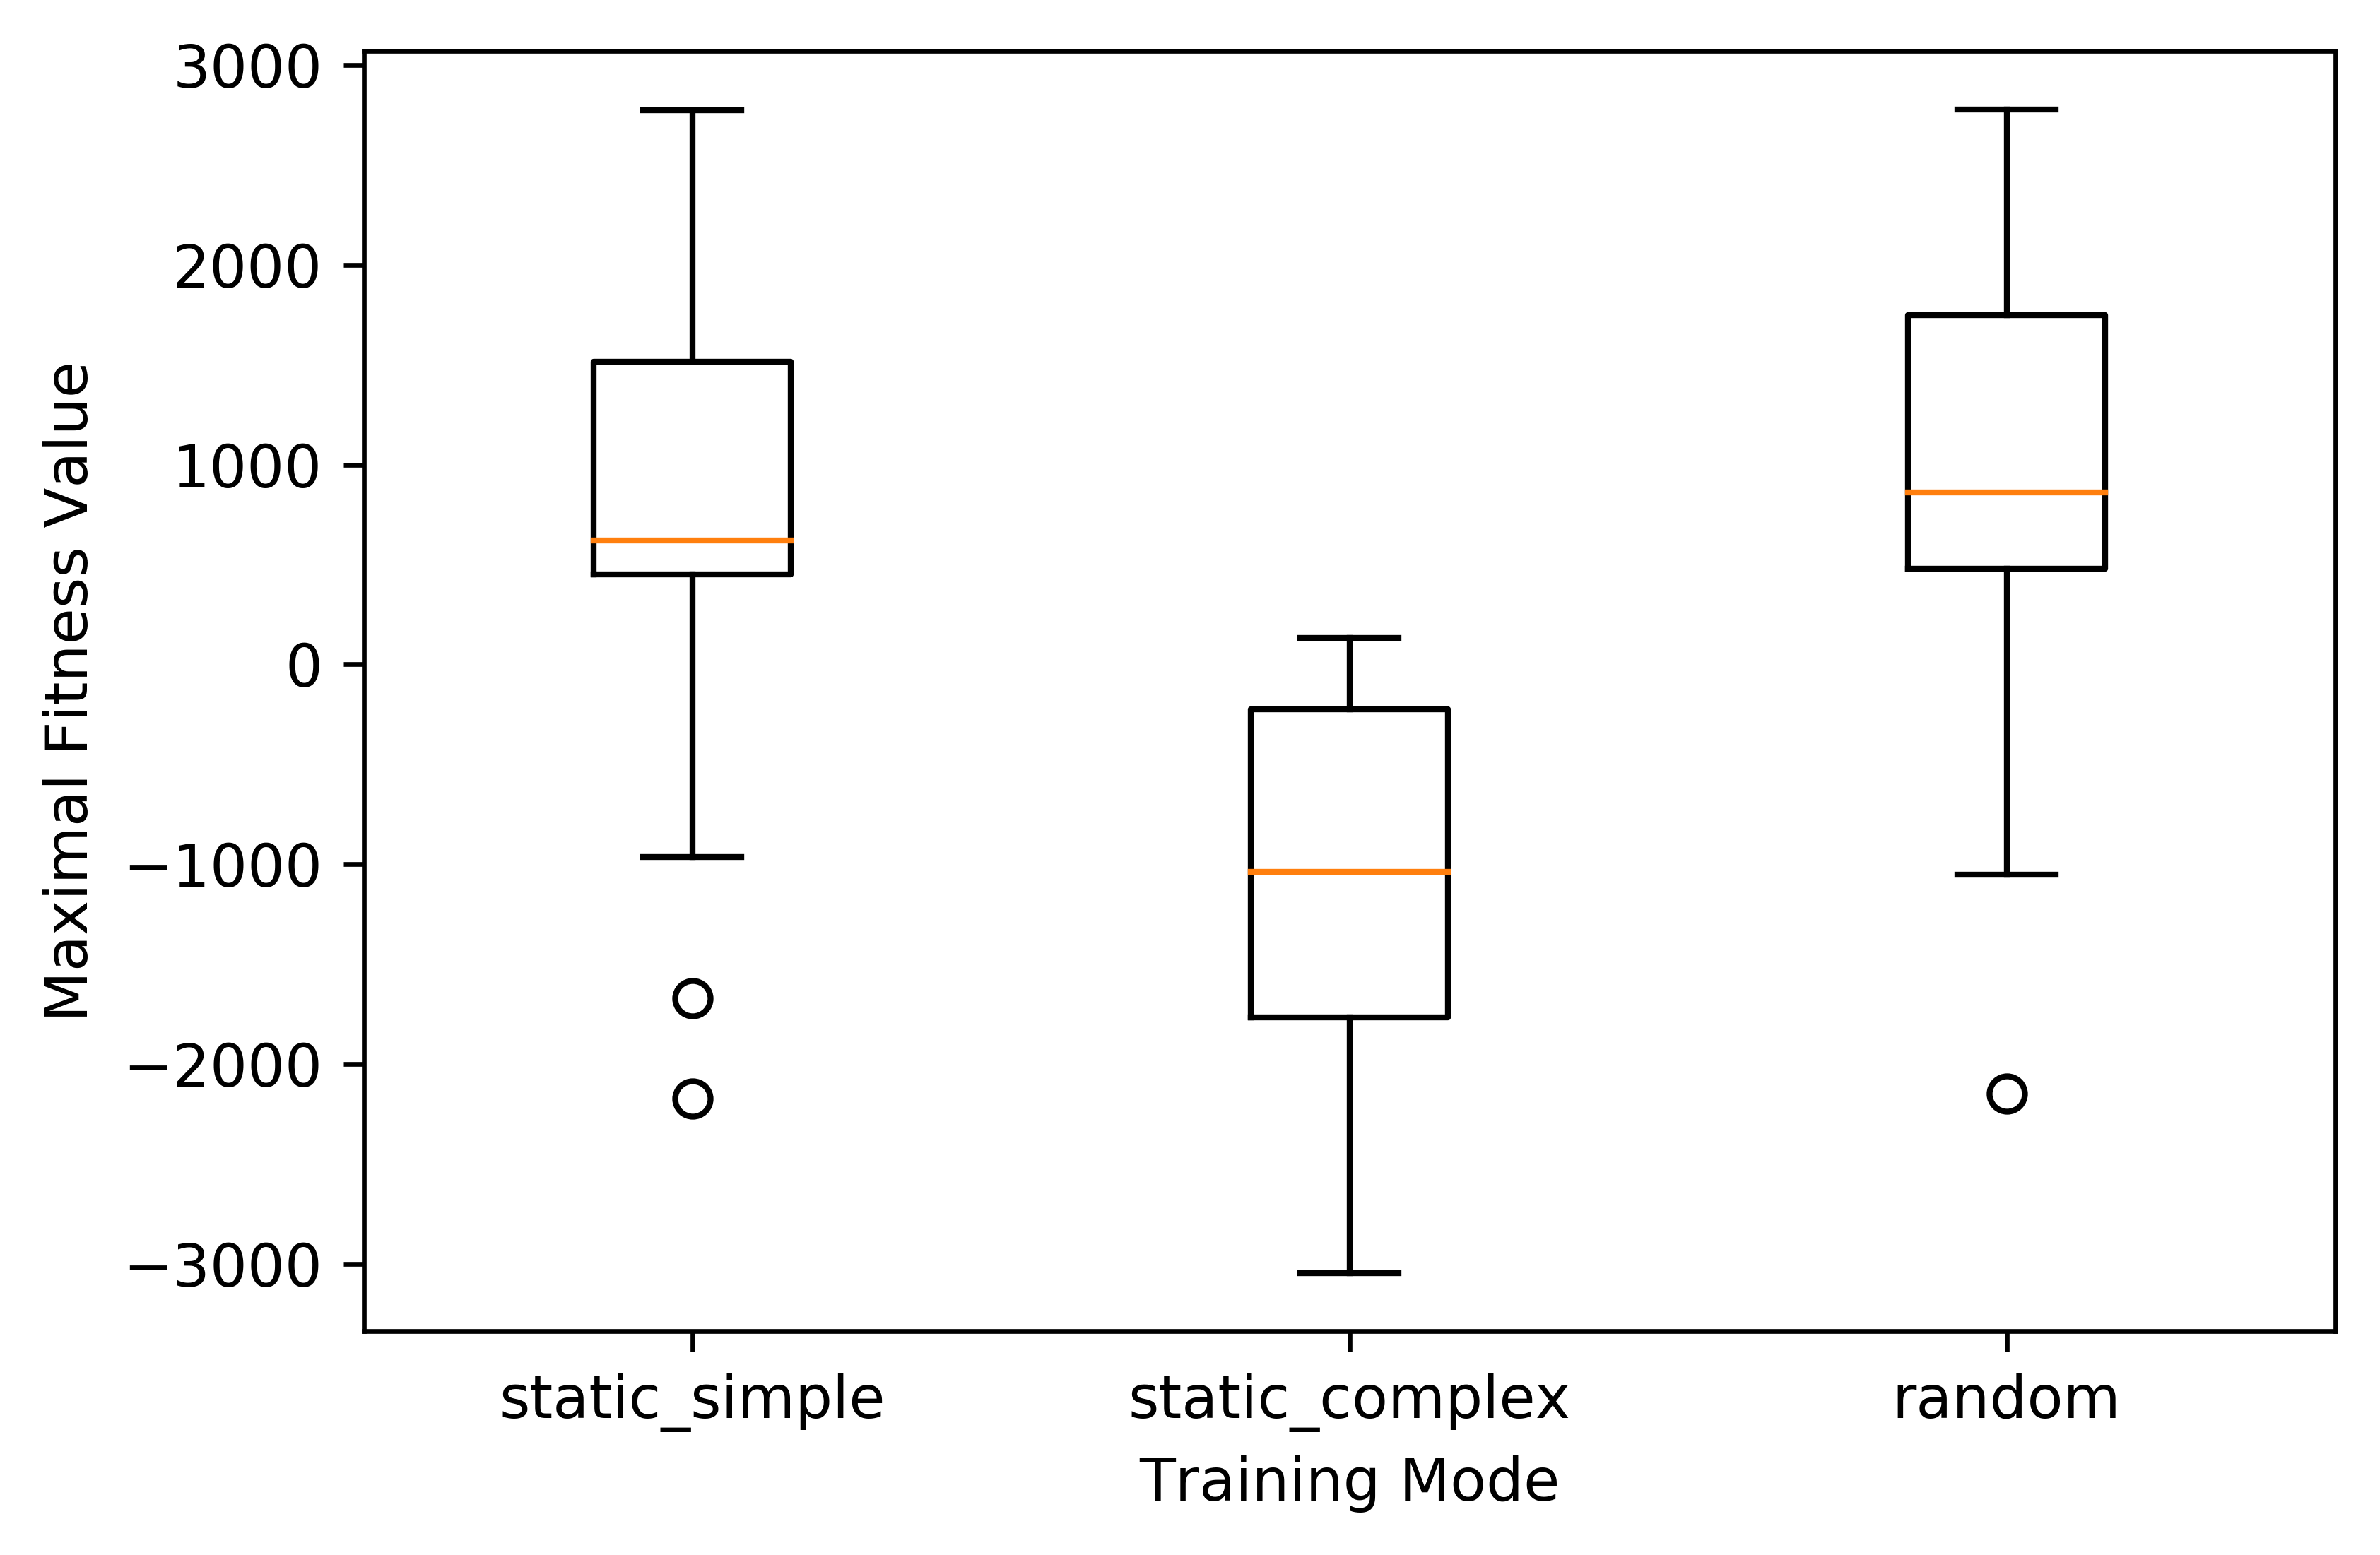

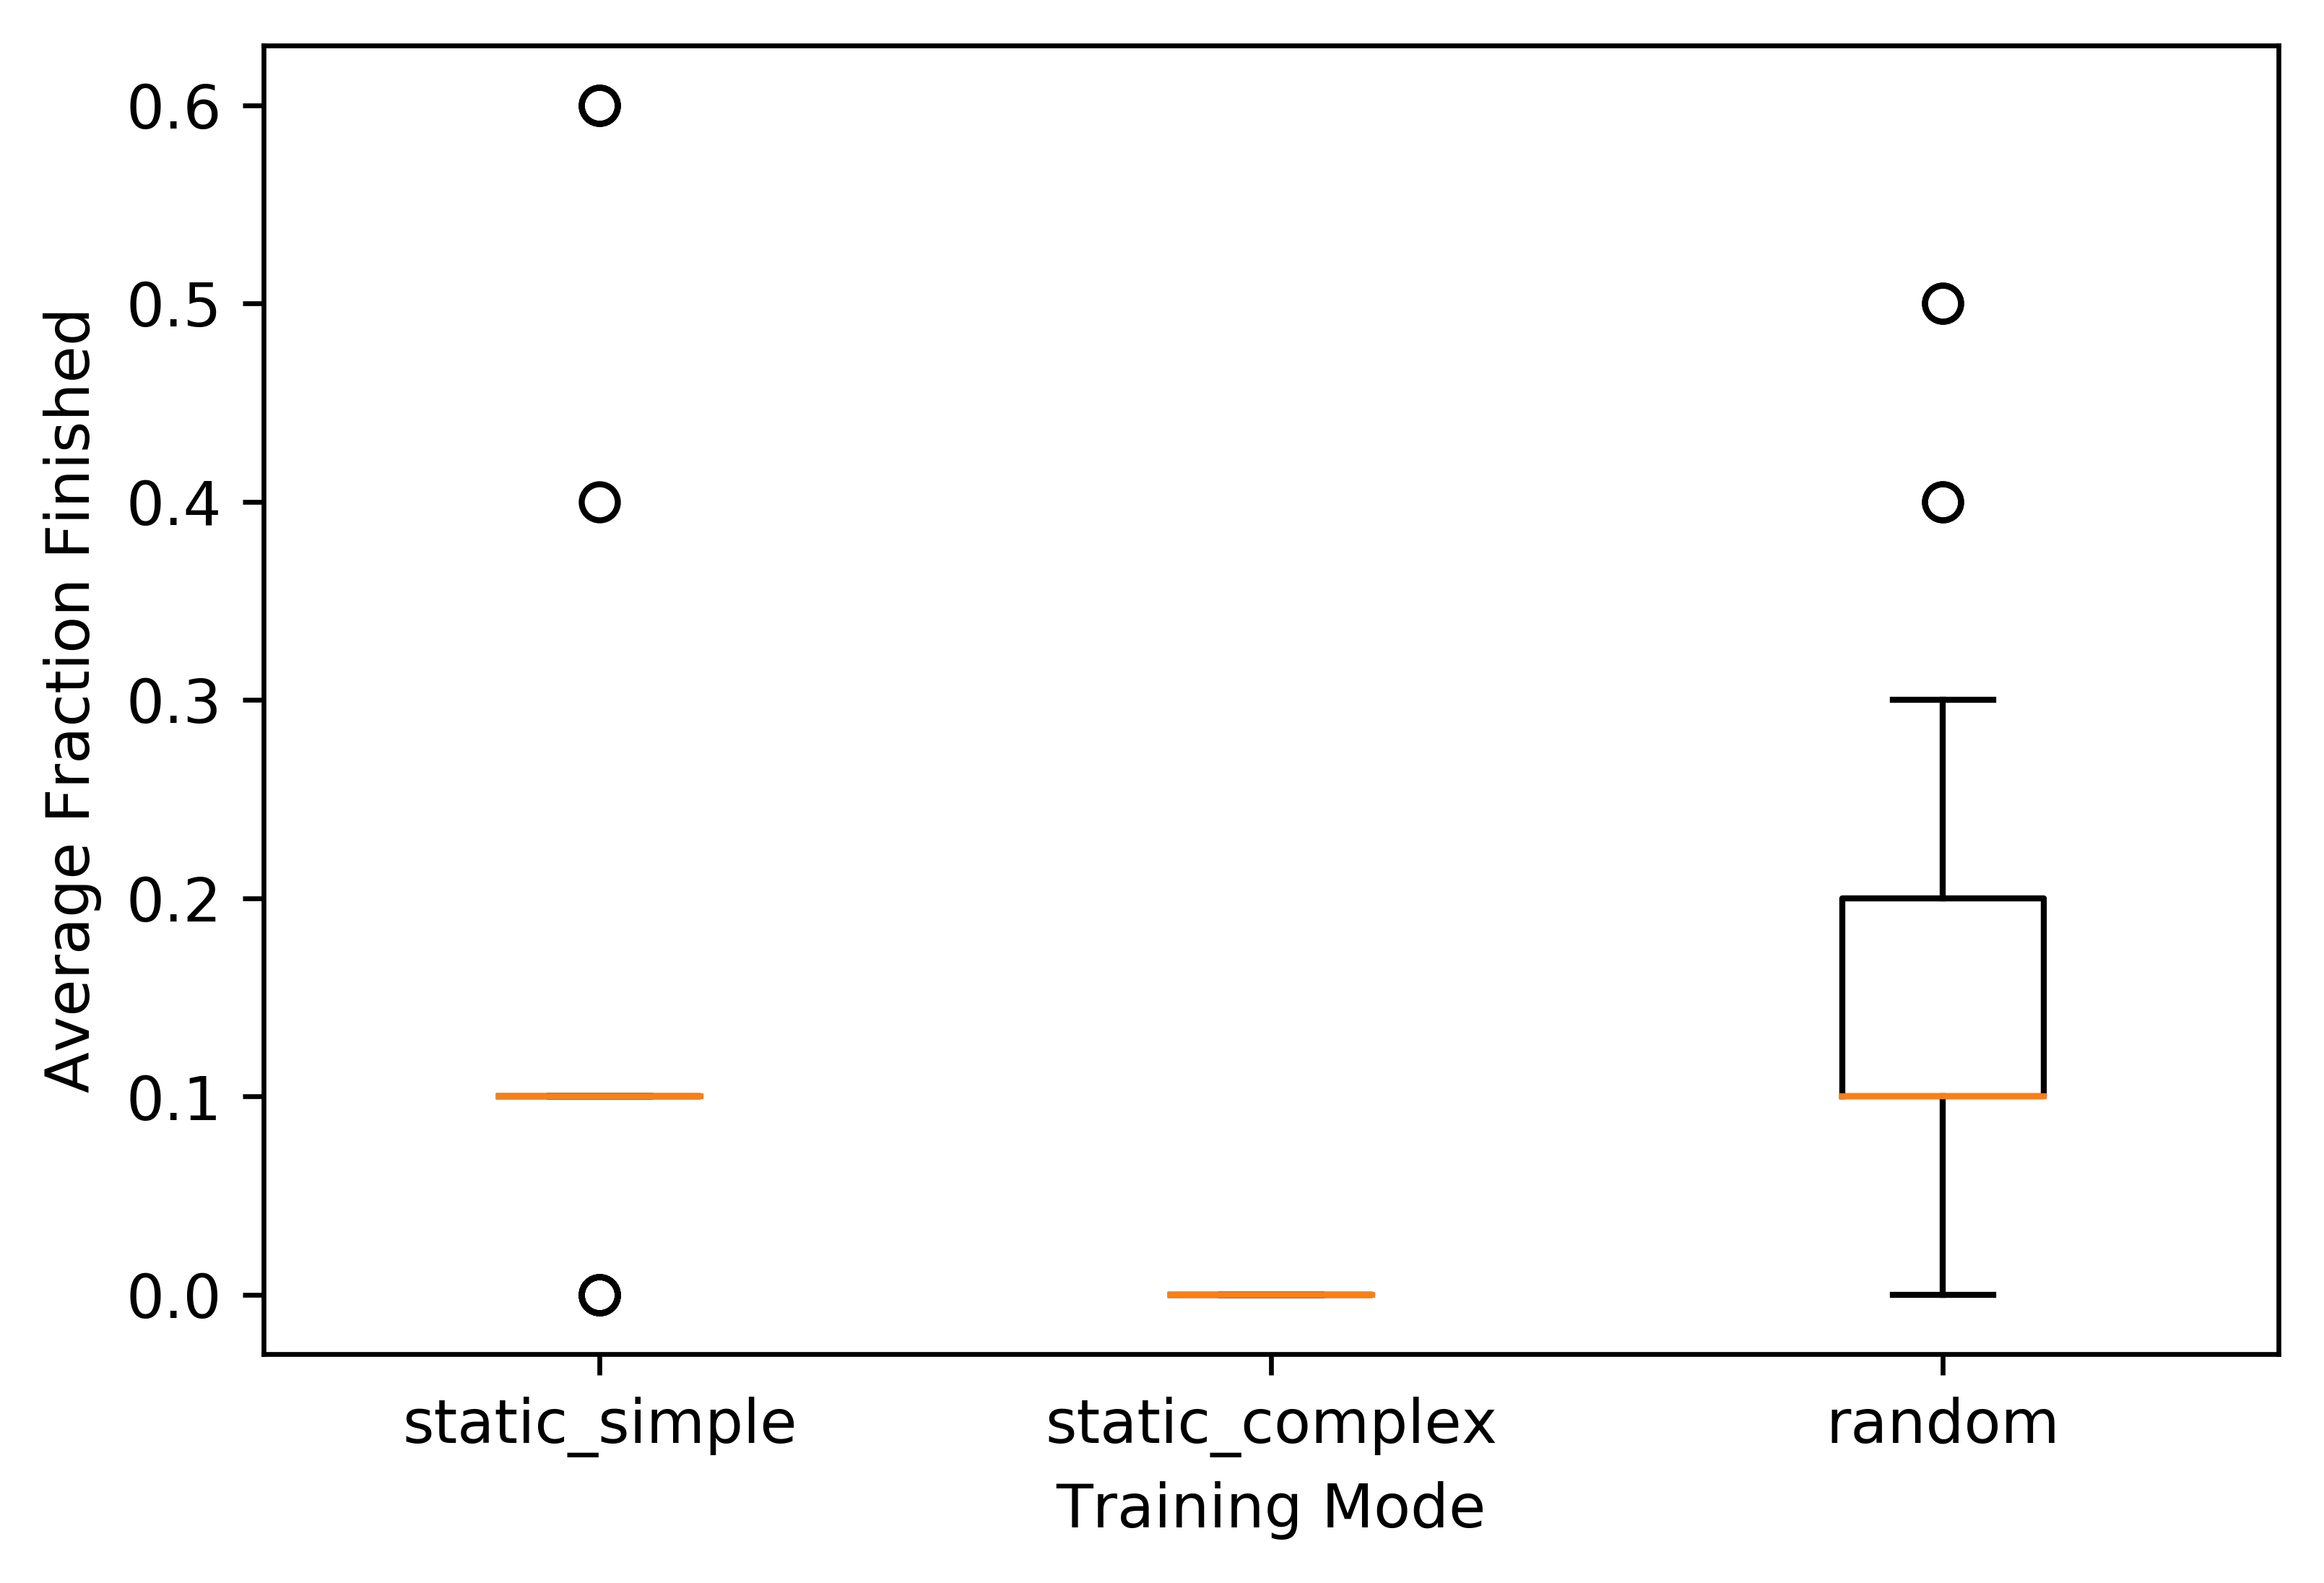

In [81]:
from statistics import median

def plot_percentage_finished(base_path):
    paths = glob.glob(base_path + '*')
    properties = ['static', 'static_simple', 'random']
    
    eval_dict_fitnesses = {}
    eval_dict_finishes = {}
    for property_ in properties:
        median_fitnesses = [] # What is the median fitness across the maps?
        finish_percentages = [] # What is the average number of cars that finish?
        mutation_paths = glob.glob(base_path + str(property_))
        for path in mutation_paths:
            if os.path.isfile(path + "/finish_history.json"):
                median_fitness = max(json.load(open(path + "/fitness_history.json"))[0])
                finish_percentage = json.load(open(path + "/finish_history.json"))[-1]
                finish_percentage = sum(finish_percentage)/len(finish_percentage)
                if median_fitness > -1000000:
                    median_fitnesses.append(median_fitness)
                finish_percentages.append(finish_percentage)
        eval_dict_fitnesses[property_] = median_fitnesses
        eval_dict_finishes[property_] = finish_percentages
    eval_dict_fitnesses['static_complex'] = eval_dict_fitnesses['static']
    eval_dict_finishes['static_complex'] = eval_dict_finishes['static']
    del eval_dict_fitnesses['static']
    del eval_dict_finishes['static']
    
    ordered_data_fitnesses = collections.OrderedDict()
    ordered_data_finishes = collections.OrderedDict()
    for k in ['static_simple', 'static_complex', 'random']:
        ordered_data_fitnesses[k] = eval_dict_fitnesses[k]
        ordered_data_finishes[k] = eval_dict_finishes[k]
    
    print("eval_dict_fitnesses: " + str(ordered_data_fitnesses))
    print("eval_dict_finishes: " + str(ordered_data_finishes))
    
    # Maximal Fitness Values
    plt.boxplot(ordered_data_fitnesses.values())
    plt.xlabel("Training Mode")
    plt.ylabel("Maximal Fitness Value")
    plt.xticks(list(range(1, len(ordered_data_fitnesses.keys())+1)), ordered_data_fitnesses.keys())
    plt.show()
    
    # Average Percentage Finished
    plt.boxplot(ordered_data_finishes.values())
    plt.xlabel("Training Mode")
    plt.ylabel("Average Fraction Finished")
    plt.xticks(list(range(1, len(ordered_data_finishes.keys())+1)), ordered_data_finishes.keys())
    plt.show()

plot_percentage_finished(base_path='07-Mar-2018_*rounds_50_num_networks_10evalround_0_test9_seed_*_mode_')